In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

1.13.1


In [3]:
from __future__ import absolute_import, division, print_function
tf.enable_eager_execution()

In [4]:
tf.executing_eagerly()

True

In [5]:
x = [[2.]]

In [6]:
m = tf.matmul(x,x)

In [7]:
m

<tf.Tensor: id=2, shape=(1, 1), dtype=float32, numpy=array([[4.]], dtype=float32)>

In [8]:
import numpy as np
x_data = np.random.random((10000,2))

In [9]:
x_data

array([[0.91121492, 0.24328611],
       [0.98441859, 0.00327059],
       [0.57609218, 0.77304134],
       ...,
       [0.0236402 , 0.83380993],
       [0.58024108, 0.47693426],
       [0.5370973 , 0.59551876]])

In [10]:
sample_weight = np.array([[3,4]])

In [11]:
sample_weight


array([[3, 4]])

In [12]:
y_data = np.matmul(x_data, sample_weight.transpose())

In [13]:
y_data


array([[3.70678921],
       [2.96633815],
       [4.8204419 ],
       ...,
       [3.4061603 ],
       [3.64846026],
       [3.99336695]])

In [14]:
y_data = np.add(y_data, np.random.uniform(-0.5,0.5))

In [15]:
y_data

array([[3.21266677],
       [2.47221571],
       [4.32631946],
       ...,
       [2.91203786],
       [3.15433782],
       [3.49924451]])

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

In [17]:
x_train


array([[0.08688451, 0.64009202],
       [0.67139484, 0.76129609],
       [0.73437102, 0.26068576],
       ...,
       [0.09650186, 0.88328875],
       [0.83833181, 0.96451099],
       [0.6292761 , 0.84239532]])

In [18]:
#Sử dụng thư viện để khai báo các biến cần thiết sử dụng trong quá trình training
tfe = tf.contrib.eager


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [19]:
# Khai báo biến
W = tfe.Variable([[1.0, 1.0]])
b = tfe.Variable(np.random.uniform(-0.2,0.2))

In [20]:
# Linear Regression definition
def linear_regression(inputs):
    return tf.matmul(inputs, W, transpose_b = True)
# Loss function - Mean square error

def loss_function(model_fn, inputs, labels):
    return tf.reduce_mean(tf.square(model_fn(inputs) -labels))

In [21]:
#Parameters
learning_rate = 0.005
num_steps = 10000

In [22]:
#Optimizer

optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)

#Tính đạo hàm của loss function

grad = tfe.implicit_gradients(loss_function)

In [23]:
for step in range(num_steps):
    optimizer.apply_gradients(grad(linear_regression, np.float32(x_train) ,  np.float32(y_train)))
    if step % 100 == 0:
        train_loss = loss_function(linear_regression, np.float32(x_train) ,  np.float32(y_train))
        test_loss = loss_function(linear_regression, np.float32(x_test) ,  np.float32(y_test))
        print("Step: {} \t Train_loss: {} \t Test_loss: {}".format(step, train_loss, test_loss))

Instructions for updating:
Colocations handled automatically by placer.
Step: 0 	 Train_loss: 5.028865337371826 	 Test_loss: 4.996809482574463
Step: 100 	 Train_loss: 1.6097673177719116 	 Test_loss: 1.600975513458252
Step: 200 	 Train_loss: 0.543512225151062 	 Test_loss: 0.5428509712219238
Step: 300 	 Train_loss: 0.20914486050605774 	 Test_loss: 0.2113669514656067
Step: 400 	 Train_loss: 0.10272368043661118 	 Test_loss: 0.10593034327030182
Step: 500 	 Train_loss: 0.06753509491682053 	 Test_loss: 0.07100927829742432
Step: 600 	 Train_loss: 0.05480904504656792 	 Test_loss: 0.05827154591679573
Step: 700 	 Train_loss: 0.04933663457632065 	 Test_loss: 0.05267968401312828
Step: 800 	 Train_loss: 0.04634925723075867 	 Test_loss: 0.049535490572452545
Step: 900 	 Train_loss: 0.04432959854602814 	 Test_loss: 0.04735157638788223
Step: 1000 	 Train_loss: 0.04277646169066429 	 Test_loss: 0.04563941806554794
Step: 1100 	 Train_loss: 0.041508834809064865 	 Test_loss: 0.0442231222987175
Step: 1200 	 T

In [24]:
W
b.numpy()

0.0658176

In [25]:
y_pred = linear_regression(np.float32(x_test))

In [26]:
y_pred

<tf.Tensor: id=221824, shape=(2000, 1), dtype=float32, numpy=
array([[1.1924907],
       [3.8586187],
       [1.1689467],
       ...,
       [3.966784 ],
       [1.4507015],
       [1.6788173]], dtype=float32)>

In [27]:
y_test

array([[0.88156913],
       [3.8987363 ],
       [0.825067  ],
       ...,
       [4.04156534],
       [1.1347271 ],
       [1.43626886]])

In [28]:
import matplotlib.pyplot as plt 


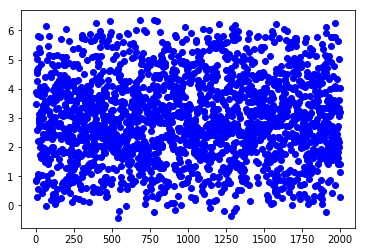

In [29]:
plt.plot(range(len(y_test)), y_test, 'bo')

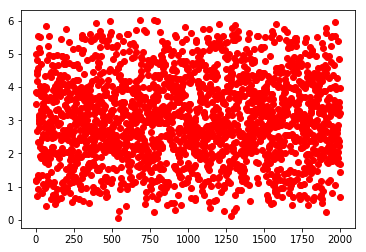

In [30]:
plt.plot(range(len(y_pred.numpy())), y_pred.numpy(), 'ro')